# SALES PREDICTION

## DATA

In [1]:
# IMPORTINIG WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [2]:
# IMPORTING NECESSARY DEPENDENCIES
import numpy as np
import pandas as pd

In [3]:
# LOADING DATASET
sales = pd.read_csv("C:/Users/uwaom/Desktop/SALES PREDICTION/advertising.csv") # ''
sales.head(10) # Shows the first ten rows of the dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
# Shows the last ten rows of the dataset
sales.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


## EXPLORATORY DATA ANALYSIS

In [5]:
# NUMBER OF ROWS AND COLUMNS
sales.shape

(200, 4)

In [6]:
# BASIC INFO
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# STATISTICAL INFO
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
# NUMBER OF DUPLICATES
sales.duplicated().sum()

0

In [9]:
# MISSING VALUES
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**The DataSet is okay as there is no Duplicates, or Missing Values.**

## VISUALIZATION

In [10]:
# IMPORTING NECESSARY DEPENDENCIES FOR VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

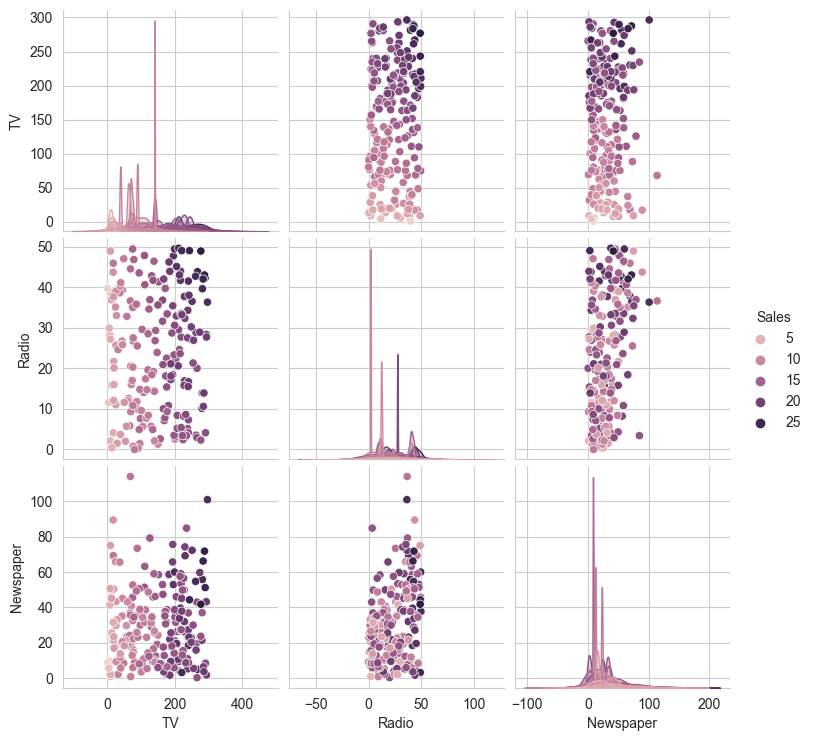

In [11]:
# VISUALIZATION OF DATASET
sns.pairplot(sales, hue='Sales')
plt.show()

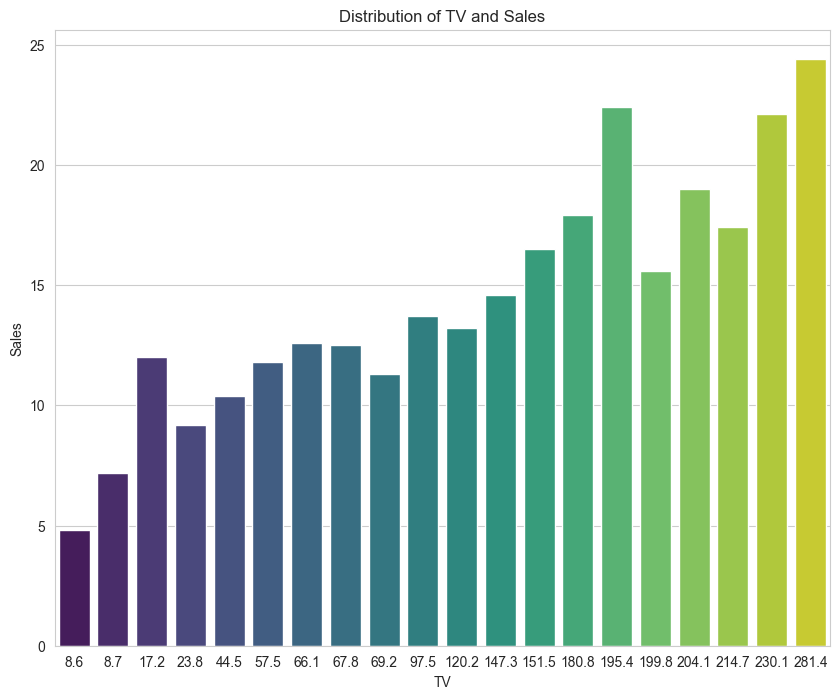

In [12]:
plt.figure(figsize=(10, 8))
sns.barplot(x=sales['TV'].head(20), y=sales['Sales'], palette='viridis')
plt.title('Distribution of TV and Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

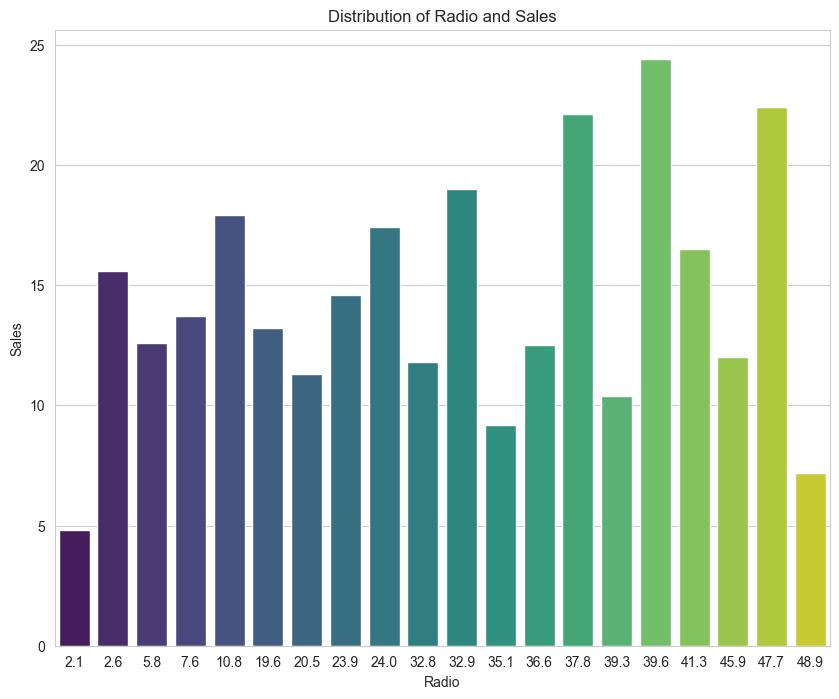

In [13]:
plt.figure(figsize=(10, 8))
sns.barplot(x=sales['Radio'].head(20), y=sales['Sales'], palette='viridis')
plt.title('Distribution of Radio and Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

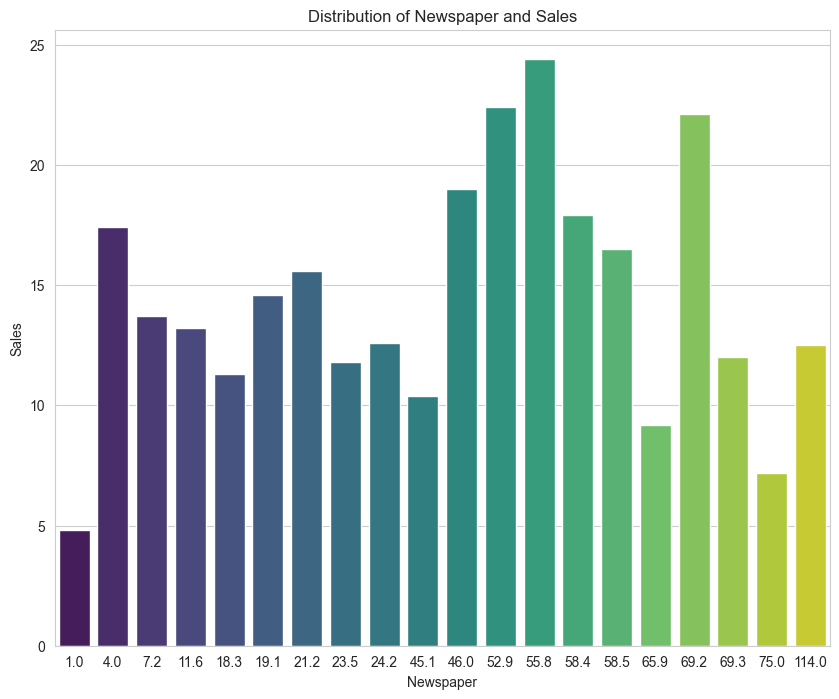

In [14]:
plt.figure(figsize=(10, 8))
sns.barplot(x=sales['Newspaper'].head(20), y=sales['Sales'], palette='viridis')
plt.title('Distribution of Newspaper and Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

## FINDING CORRELATIONS

In [15]:
sales.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


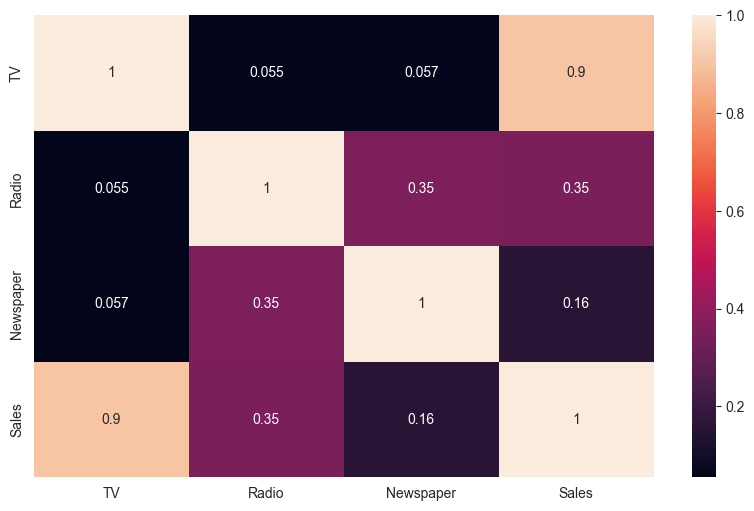

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(sales.corr(), annot=True)
plt.show()

## Features and Targets Assigning

In [17]:
X = sales[['TV', 'Radio', 'Newspaper']] # .drop(['Sales'], axis=1)
y = sales['Sales']

In [18]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


## TRAIN TEST SPLIT

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [21]:
# X_train.head()
X_train_df = pd.DataFrame(X_train)
X_train_df.head()

,TV,Radio,Newspaper
168,215.4,23.6,57.6
112,175.7,15.4,2.4
171,164.5,20.9,47.4
181,218.5,5.4,27.4
7,120.2,19.6,11.6


In [22]:
# X_test.head()
X_test_df = pd.DataFrame(X_test)
X_test_df.head()

,TV,Radio,Newspaper
126,7.8,38.9,50.6
104,238.2,34.3,5.3
99,135.2,41.7,45.9
92,217.7,33.5,59.0
111,241.7,38.0,23.2


In [23]:
y_train.head()

168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
Name: Sales, dtype: float64

In [24]:
y_test.head()

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
Name: Sales, dtype: float64

In [25]:
sales_drop = sales.drop(['Sales'], axis=1)
sales_drop

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [26]:
sales_drop.corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


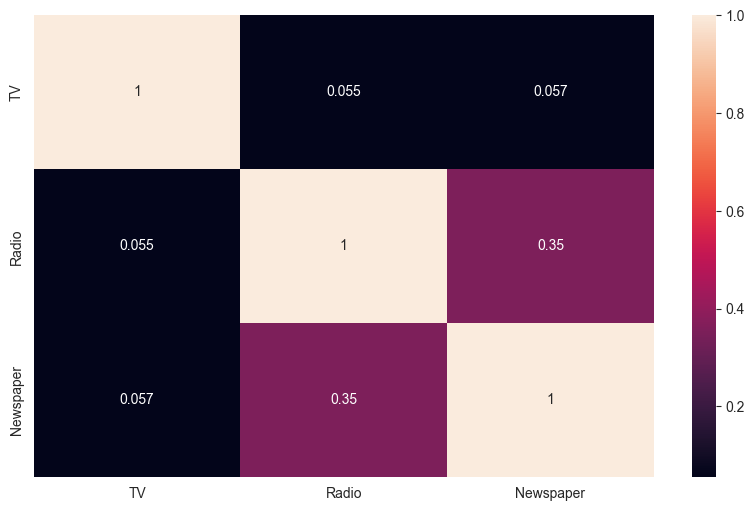

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(sales_drop.corr(), annot=True)
plt.show()

## Model Training

**Model used will be Logistic Regression**

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
linreg = LinearRegression()

In [30]:
linreg.fit(X_train, y_train)

LinearRegression()

In [31]:
X_train

,TV,Radio,Newspaper
168,215.4,23.6,57.6
112,175.7,15.4,2.4
171,164.5,20.9,47.4
181,218.5,5.4,27.4
7,120.2,19.6,11.6
...,...,...,...
87,110.7,40.6,63.2
103,187.9,17.2,17.9
67,139.3,14.5,10.2
24,62.3,12.6,18.3


In [32]:
y_train

168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 160, dtype: float64

## Making Predictions on the Train Set

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
# Predictions on the Train Set
y_train_pred = linreg.predict(X_train)

## Calculating the Regression Metrics on the Train Set

In [35]:
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)


In [36]:
print("REGRESSION METRICS FOR THE TRAIN SET: \n")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)


REGRESSION METRICS FOR THE TRAIN SET: 

Mean Absolute Error (MAE): 1.1951978214013919
Mean Squared Error (MSE): 2.600948786894829
R-squared (R^2): 0.9114914479108845


## Calculating the Regression Metrics on the Test Set

In [37]:
# Predictions on the Test Set
y_pred = linreg.predict(X_test)

In [38]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [39]:
print("REGRESSION METRICS FOR THE TEST SET: \n")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

REGRESSION METRICS FOR THE TEST SET: 

Mean Absolute Error (MAE): 1.4149258169276044
Mean Squared Error (MSE): 3.3509887213291782
R-squared (R^2): 0.8296690596780842


In [40]:
y_pred

array([ 9.24156185, 20.88863168, 16.35932288, 19.99325582, 21.56647985,
       16.18902526, 13.55593173, 15.44101643, 20.68858089, 20.87635961,
       12.30666696, 20.5823859 ,  8.2052026 , 16.8020073 , 10.49789975,
       10.04517517, 16.27471961, 14.58389375, 17.15124514, 12.54217786,
       18.5255145 , 12.14739801, 20.26906823, 17.68550321, 16.70332653,
       21.47564231, 20.03074293, 10.79641986, 19.02391131, 14.77388184,
       13.01107071,  9.11899998, 12.07692797, 16.60311172,  8.43700724,
       13.99646169,  9.96423595, 14.29142558, 16.80210584, 17.11029489])

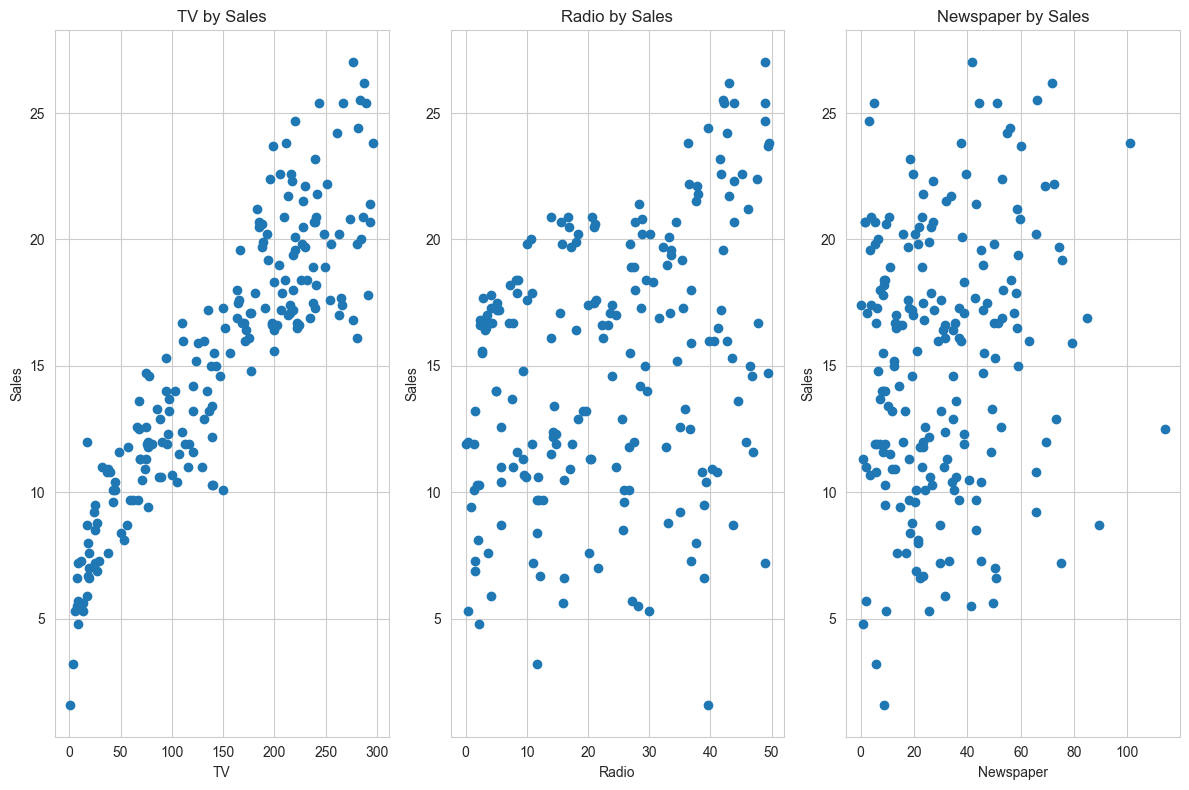

In [41]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 8))

# Plot of TV medium against Sales
axs[0].scatter(sales['TV'], sales['Sales'])
axs[0].set_title('TV by Sales')
axs[0].set_xlabel("TV")
axs[0].set_ylabel('Sales')

# Plot of Radio against Sales
axs[1].scatter(sales['Radio'], sales['Sales'])
axs[1].set_title('Radio by Sales')
axs[1].set_xlabel('Radio')
axs[1].set_ylabel('Sales')

# Plot of Newspaper against Sales
axs[2].scatter(sales['Newspaper'], sales['Sales'])
axs[2].set_title('Newspaper by Sales')
axs[2].set_xlabel('Newspaper')
axs[2].set_ylabel('Sales')

plt.tight_layout()

plt.show()

In [42]:
# Convert y_pred to a pandas DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted Sales'])

# Group the predictions by media channel
media_channel_sales = y_pred_df.groupby(X_test['TV']).mean()

# Sort the media channels by average predicted sales
media_channel_sales = media_channel_sales.sort_values(by='Predicted Sales', ascending=False)


In [43]:

# Print the results
print("Top Performing Media Channels by Predicted Sales:")
print(media_channel_sales)

Top Performing Media Channels by Predicted Sales:
       Predicted Sales
TV                    
214.7        20.582386
97.2         12.076928
195.4        10.045175
112.9         9.119000


## Inference

#### Based on the information provided in the scatter plots and the typical interpretation of such data:

1. **TV Advertising**: 
   - The "TV by Sales" scatter plot shows a clear positive correlation between TV advertising spending and sales. As the TV advertising budget increases, sales also tend to increase. This suggests that TV adveris may be the most influential factor in driving sales based on the visual relationship depicted in the plot.

2. **Radio Advertising**:
   - The "Radio by Sales" scatter plot also indicates a positive correlation between radio advertising spending and sales, although the relationship may be slightly weaker compared to TV advertising. Radio advertising appears to have a moderate influence on sales based on the plot.

3. **Newspaper Advertising**:
   - The "Newspaper by Sales" scatter plot shows a more scattered distribution of data points, indicating a less clear relationship between newspaper advertising spending and sales. This suggests that newspaper advertising may have the least influence on sales compared to TV and radio advertising.

Therefore, based on the scatter plots and the observed relationships, TV advertising appears to be the most influential factor in driving sales, followed by radio advertising. Newspaper advertising seems to have the least influence on sales among the three media channels analyzed in the plots.